# О датасете

**Набор данных о здоровье сна и образе жизни**

Набор данных о здоровье сна и образе жизни содержит 400 строк и 13 столбцов, охватывающих широкий спектр переменных, связанных со сном и повседневными привычками. Он включает в себя такие данные, как пол, возраст, профессия, продолжительность и качество сна, уровень физической активности, уровень стресса, категория ИМТ, кровяное давление, частота сердечных сокращений, ежедневные шаги и наличие или отсутствие нарушений сна.

**Основные характеристики набора данных:**

* Person ID (Идентификатор пользователя): Идентификатор для каждого человека.* * Gender (Пол): Пол человека (мужчина/женщина).
* Age (Возраст): Возраст человека в годах.
* Occupation (Род занятий): Род занятий или профессия человека.
* Sleep Duration (hours) (Продолжительность сна (в часах)): Количество часов, которое человек спит в сутки.
* Quality of Sleep (scale: 1-10) (Качество сна (шкала от 1 до 10)): Субъективная оценка качества сна в диапазоне от 1 до 10.
* Physical Activity Level (minutes/day) (Уровень физической активности (минуты в день)): Количество минут, которые человек ежедневно уделяет физической активности.
* Stress Level (scale: 1-10) (Уровень стресса (шкала от 1 до 10)): субъективная оценка уровня стресса, испытываемого человеком, в диапазоне от 1 до 10.
* BMI Category (Категория ИМТ): Категория ИМТ человека (например, недостаточный вес, нормальный, избыточный вес с избыточной массой тела).
* Blood Pressure (systolic/diastolic) (Артериальное давление (систолическое/диастолический давление)): Измерение артериального давления человека, показывающее превышение систолического давления над диастолическим давлением.
* Heart Rate (bpm) (Частота сердечных сокращений (чсс)): Частота сердечных сокращений человека в состоянии покоя в ударах в минуту.
* Daily Steps (Количество шагов в день): Количество шагов, которые человек делает за день.
* Sleep Disorder (Нарушение сна): Наличие или отсутствие у человека нарушений сна (отсутствие таковых, бессонница, апноэ во сне).
Подробная информация о нарушениях сна:

**Нет:** у пациента нет каких-либо специфических нарушений сна.

**Бессонница:** Пациент испытывает трудности с засыпанием или продолжительным пребыванием во сне, что приводит к неадекватному или некачественному сну.

**Апноэ во сне:** Человек страдает от пауз в дыхании во время сна, что приводит к нарушению режима сна и потенциальному риску для здоровья.

In [223]:
!pip install pandas seaborn scikit-learn

# Домашнее задание 3

1. Выбрать номинальное значение как целевую переменную
2. Провести разведочный анализ **включая** анализ зависимости между номинальными переменными (chi2)
3. Выбрать `best_features`
4. Сделать нормализацию данных (scaler, onehotencoding)
4. Обучить модель логистической регрессии
5. Вывести метрики качества, описать полученный результат (также вывести коэфициенты модели)

# 1. Выбрать номинальное значение как целевую переменную

**Целева переменная:**

Stress Level (scale: 1-10) (Уровень стресса (шкала от 1 до 10))

# Вспоминаем датасет

определяем тип переменных и заполняем пропуски

In [224]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [225]:
PATH_TO_FILE: str = '/content/Sleep_health_and_lifestyle_dataset.csv' # Загрузка набора данных
## p.s. в левой панеле нажать на папку и перетащить туда файл,
## а wince.csv заменить на свой вариант (ПКМ -> копировать путь)

df = pd.read_csv(PATH_TO_FILE) # функция превращение данных из CSV в DataFrame

In [226]:
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [227]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [228]:
#plt.figure(figsize=(10,6))
#sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", center=0)
#plt.title("Корреляции числовых признаков")
#plt.show()

In [229]:
df['Gender'] = df['Gender'].astype('category')
df['Quality of Sleep'] = df['Quality of Sleep'].astype('category')
df['Stress Level'] = df['Stress Level'].astype('category')
df['BMI Category'] = df['BMI Category'].astype('category')
df['Person ID'] = df['Person ID'].astype('object')

In [230]:
df['Sleep Disorder'] = df['Sleep Disorder'].fillna('unknown')

In [231]:
df['Sleep Disorder'] = df['Sleep Disorder'].astype('category')

In [232]:
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,unknown
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,unknown
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,unknown
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [233]:
df.describe(include='all')

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
count,374.0,374,374.000000,374,374.000000,374.0,374.000000,374.0,374,374,374.000000,374.000000,374
unique,374.0,2,NaN,11,NaN,6.0,NaN,6.0,4,25,NaN,NaN,3
top,374.0,Male,NaN,Nurse,NaN,8.0,NaN,3.0,Normal,130/85,NaN,NaN,unknown
freq,1.0,189,NaN,73,NaN,109.0,NaN,71.0,195,99,NaN,NaN,219
mean,NaN,NaN,42.184492,NaN,7.132086,NaN,59.171123,NaN,NaN,NaN,70.165775,6816.844920,NaN
std,NaN,NaN,8.673133,NaN,0.795657,NaN,20.830804,NaN,NaN,NaN,4.135676,1617.915679,NaN
min,NaN,NaN,27.000000,NaN,5.800000,NaN,30.000000,NaN,NaN,NaN,65.000000,3000.000000,NaN
25%,NaN,NaN,35.250000,NaN,6.400000,NaN,45.000000,NaN,NaN,NaN,68.000000,5600.000000,NaN
50%,NaN,NaN,43.000000,NaN,7.200000,NaN,60.000000,NaN,NaN,NaN,70.000000,7000.000000,NaN
75%,NaN,NaN,50.000000,NaN,7.800000,NaN,75.000000,NaN,NaN,NaN,72.000000,8000.000000,NaN


In [234]:
# Количество уникальных значений
for column in df.columns:
    print(f'{column}: {df[column].nunique()} уникальных значений')

Person ID: 374 уникальных значений
Gender: 2 уникальных значений
Age: 31 уникальных значений
Occupation: 11 уникальных значений
Sleep Duration: 27 уникальных значений
Quality of Sleep: 6 уникальных значений
Physical Activity Level: 16 уникальных значений
Stress Level: 6 уникальных значений
BMI Category: 4 уникальных значений
Blood Pressure: 25 уникальных значений
Heart Rate: 19 уникальных значений
Daily Steps: 20 уникальных значений
Sleep Disorder: 3 уникальных значений


In [235]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Person ID                374 non-null    object  
 1   Gender                   374 non-null    category
 2   Age                      374 non-null    int64   
 3   Occupation               374 non-null    object  
 4   Sleep Duration           374 non-null    float64 
 5   Quality of Sleep         374 non-null    category
 6   Physical Activity Level  374 non-null    int64   
 7   Stress Level             374 non-null    category
 8   BMI Category             374 non-null    category
 9   Blood Pressure           374 non-null    object  
 10  Heart Rate               374 non-null    int64   
 11  Daily Steps              374 non-null    int64   
 12  Sleep Disorder           374 non-null    category
dtypes: category(5), float64(1), int64(4), object(3)
memory usage: 26.

# 2. Провести разведочный анализ **включая** анализ зависимости между номинальными переменными (chi2)

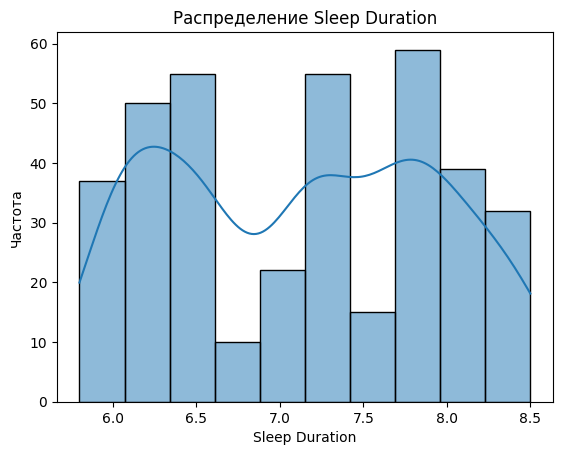

In [236]:
sns.histplot(df['Sleep Duration'], kde=True)
plt.title('Распределение Sleep Duration')
plt.xlabel('Sleep Duration')
plt.ylabel('Частота')
plt.show()

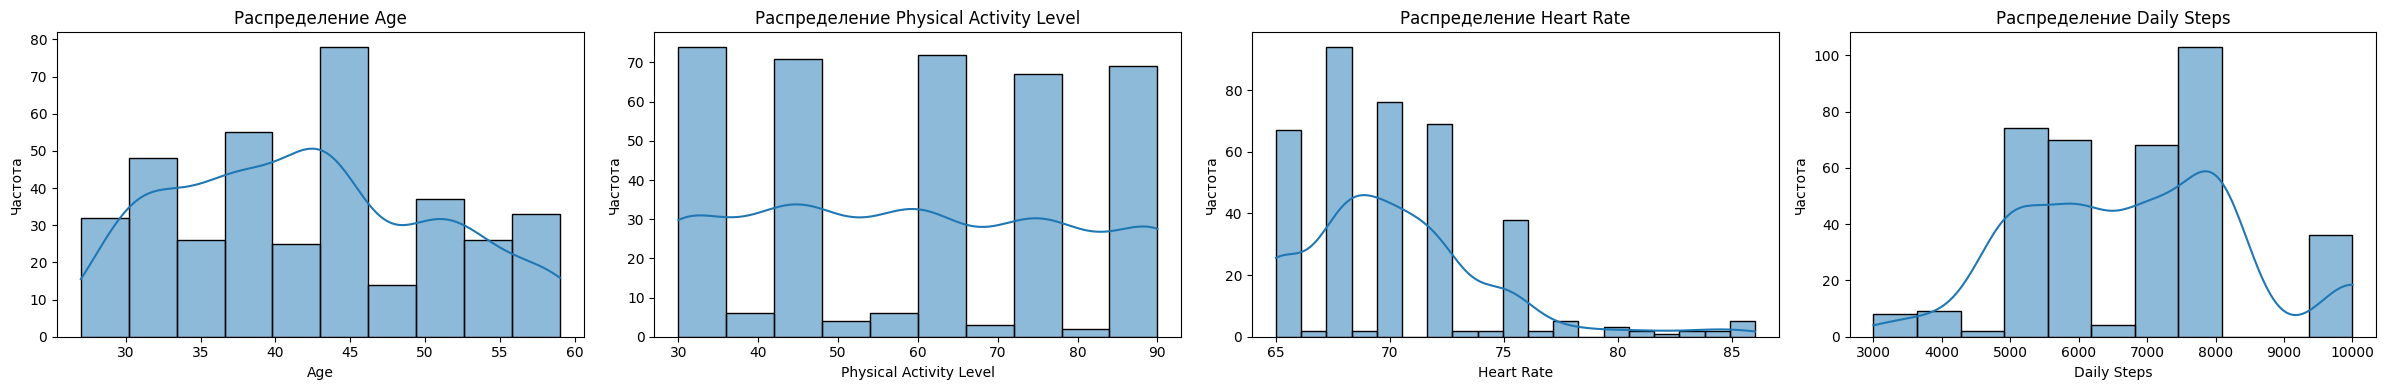

In [237]:
#ниже код для оптимизации вывода всех числовых переменных
num_cols = df.select_dtypes(include='int').columns # если есть int чиловая переменная либо + ['col1', 'col2'], либо такие колонки преобразовать во flaot
fig, axes = plt.subplots(1, len(num_cols), figsize=(6 * len(num_cols), 4))

for ax, col in zip(axes, num_cols):
    sns.histplot(df[col], kde=True, ax=ax)
    ax.set_title(f'Распределение {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Частота')

plt.tight_layout()
plt.show()

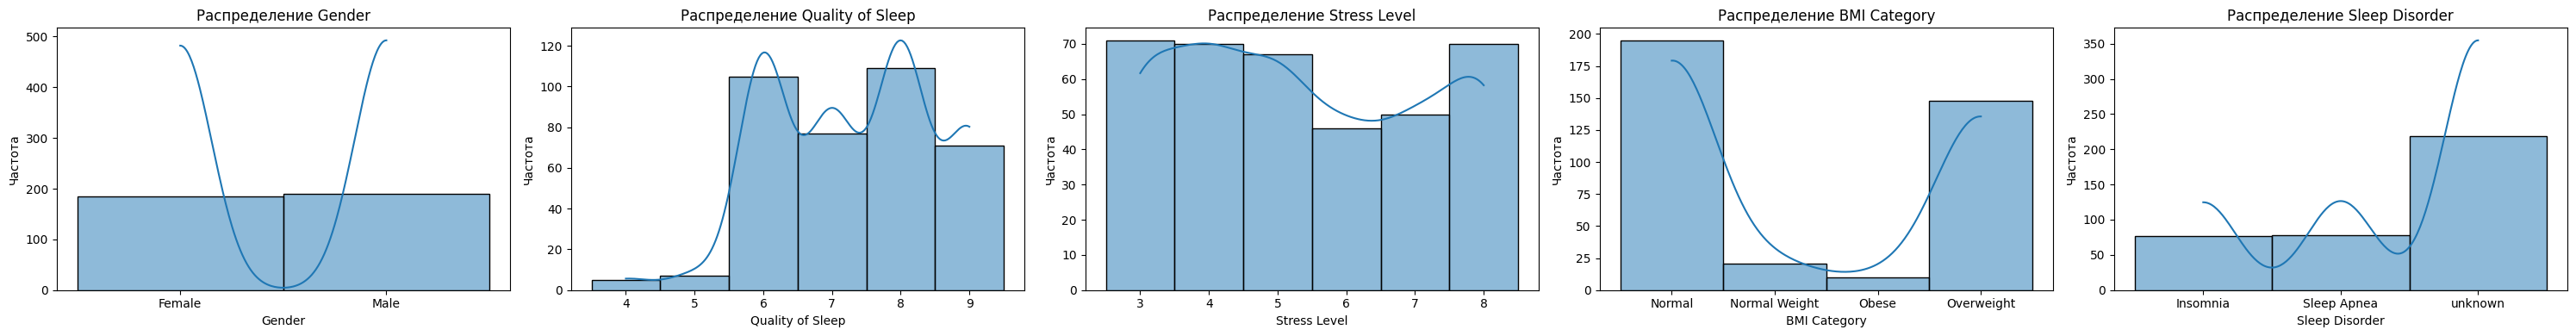

In [238]:
# ниже код для оптимизации вывода всех категориальных переменных
num_cols = df.select_dtypes(include='category').columns # или object
fig, axes = plt.subplots(1, len(num_cols), figsize=(6 * len(num_cols), 4))

for ax, col in zip(axes, num_cols):
    sns.histplot(df[col], kde=True, ax=ax)
    ax.set_title(f'Распределение {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Частота')

plt.tight_layout()
plt.show()

In [239]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Person ID                374 non-null    object  
 1   Gender                   374 non-null    category
 2   Age                      374 non-null    int64   
 3   Occupation               374 non-null    object  
 4   Sleep Duration           374 non-null    float64 
 5   Quality of Sleep         374 non-null    category
 6   Physical Activity Level  374 non-null    int64   
 7   Stress Level             374 non-null    category
 8   BMI Category             374 non-null    category
 9   Blood Pressure           374 non-null    object  
 10  Heart Rate               374 non-null    int64   
 11  Daily Steps              374 non-null    int64   
 12  Sleep Disorder           374 non-null    category
dtypes: category(5), float64(1), int64(4), object(3)
memory usage: 26.

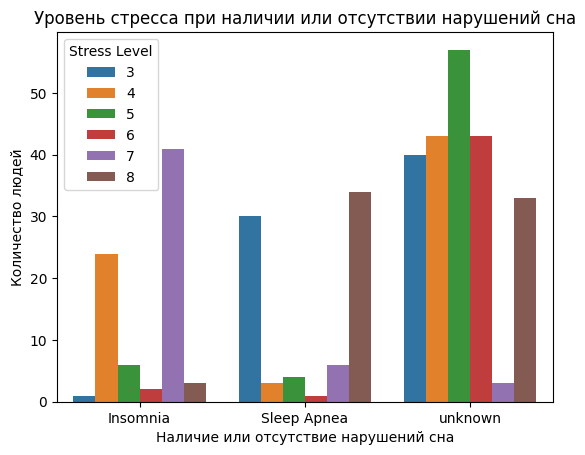

In [240]:
import seaborn as sns
import matplotlib.pyplot as plt

# визуализируем
sns.countplot(data=df, x='Sleep Disorder', hue='Stress Level')
plt.title('Уровень стресса при наличии или отсутствии нарушений сна')
plt.xlabel('Наличие или отсутствие нарушений сна')
plt.ylabel('Количество людей')
plt.show()

In [241]:
table = pd.crosstab(df['Sleep Disorder'], df['Stress Level'])
table

Stress Level,3,4,5,6,7,8
Sleep Disorder,,,,,,
Insomnia,1,24,6,2,41,3
Sleep Apnea,30,3,4,1,6,34
unknown,40,43,57,43,3,33


In [242]:
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(table)
print(f"χ² = {chi2:.2f}")
print(f"p-value = {p}")

χ² = 240.20
p-value = 6.2217173804495886e-46


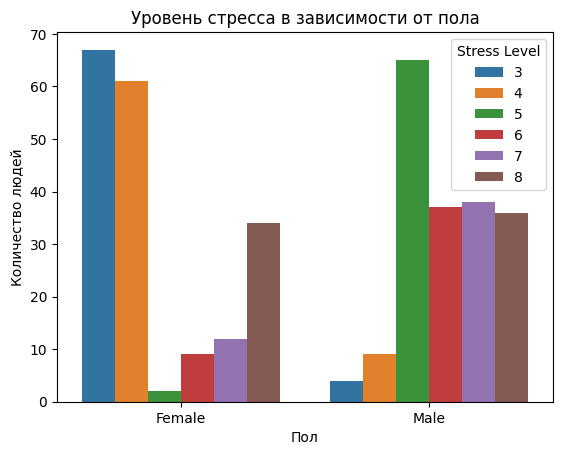

In [243]:
sns.countplot(data=df, x='Gender', hue='Stress Level')
plt.title('Уровень стресса в зависимости от пола')
plt.xlabel('Пол')
plt.ylabel('Количество людей')
plt.show()

In [244]:
table = pd.crosstab(df['Gender'], df['Stress Level'])
table

Stress Level,3,4,5,6,7,8
Gender,,,,,,
Female,67,61,2,9,12,34
Male,4,9,65,37,38,36


In [245]:
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(table)
print(f"χ² = {chi2:.2f}")
print(f"p-value = {p}")

χ² = 184.37
p-value = 6.243854563480849e-38


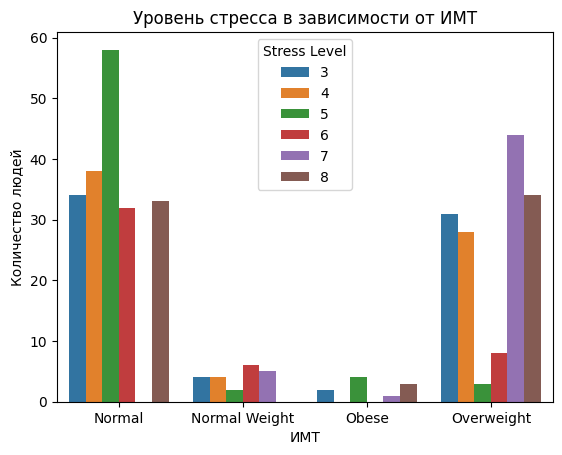

In [246]:
sns.countplot(data=df, x='BMI Category', hue='Stress Level')
plt.title('Уровень стресса в зависимости от ИМТ')
plt.xlabel('ИМТ')
plt.ylabel('Количество людей')
plt.show()

In [247]:
table = pd.crosstab(df['BMI Category'], df['Stress Level'])
table

Stress Level,3,4,5,6,7,8
BMI Category,,,,,,
Normal,34,38,58,32,0,33
Normal Weight,4,4,2,6,5,0
Obese,2,0,4,0,1,3
Overweight,31,28,3,8,44,34


In [248]:
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(table)
print(f"χ² = {chi2:.2f}")
print(f"p-value = {p}")

χ² = 120.15
p-value = 1.7708903708606013e-18


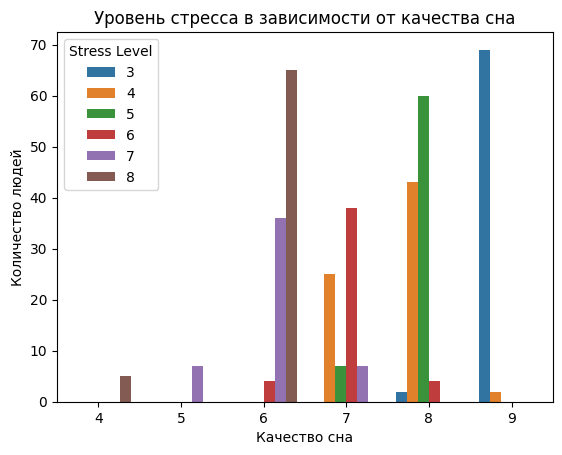

In [249]:
sns.countplot(data=df, x='Quality of Sleep', hue='Stress Level')
plt.title('Уровень стресса в зависимости от качества сна')
plt.xlabel('Качество сна')
plt.ylabel('Количество людей')
plt.show()

In [250]:
table = pd.crosstab(df['Quality of Sleep'], df['Stress Level'])
table

Stress Level,3,4,5,6,7,8
Quality of Sleep,,,,,,
4,0,0,0,0,0,5
5,0,0,0,0,7,0
6,0,0,0,4,36,65
7,0,25,7,38,7,0
8,2,43,60,4,0,0
9,69,2,0,0,0,0


In [251]:
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(table)
print(f"χ² = {chi2:.2f}")
print(f"p-value = {p}")

χ² = 847.69
p-value = 1.0377246812446288e-162


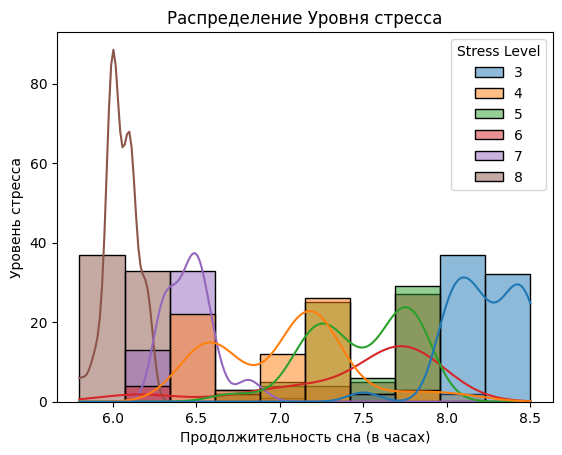

In [252]:
sns.histplot(df, x="Sleep Duration", kde=True, hue='Stress Level')
plt.title('Распределение Уровня стресса')
plt.xlabel('Продолжительность сна (в часах)')
plt.ylabel('Уровень стресса')
plt.show()

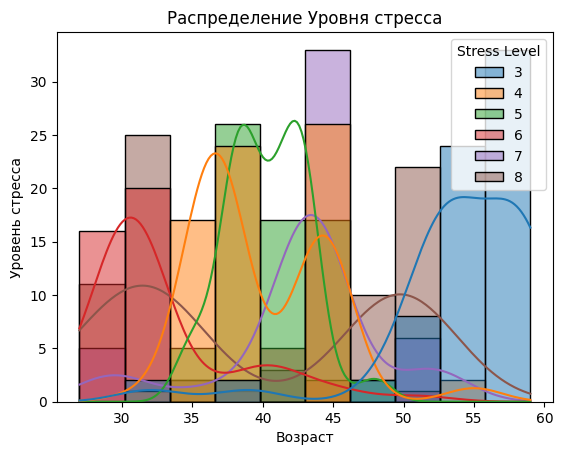

In [253]:
sns.histplot(df, x="Age", kde=True, hue='Stress Level')
plt.title('Распределение Уровня стресса')
plt.xlabel('Возраст')
plt.ylabel('Уровень стресса')
plt.show()

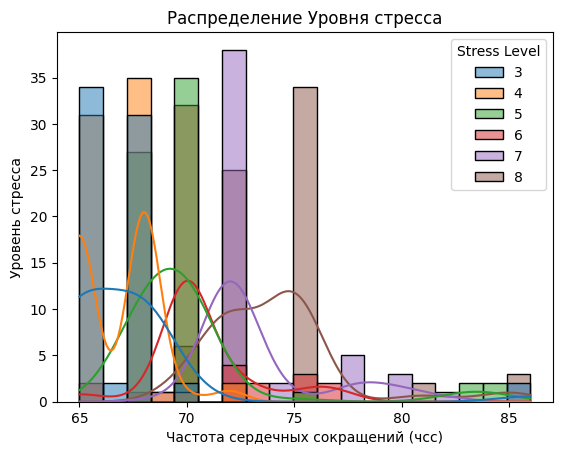

In [254]:
sns.histplot(df, x="Heart Rate", kde=True, hue='Stress Level')
plt.title('Распределение Уровня стресса')
plt.xlabel('Частота сердечных сокращений (чсс)')
plt.ylabel('Уровень стресса')
plt.show()

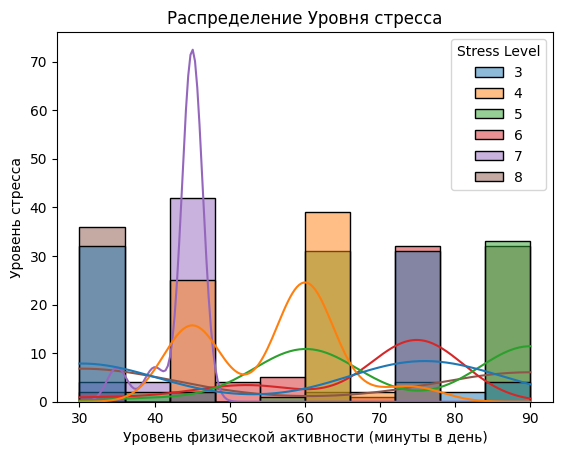

In [255]:
sns.histplot(df, x="Physical Activity Level", kde=True, hue='Stress Level')
plt.title('Распределение Уровня стресса')
plt.xlabel('Уровень физической активности (минуты в день)')
plt.ylabel('Уровень стресса')
plt.show()

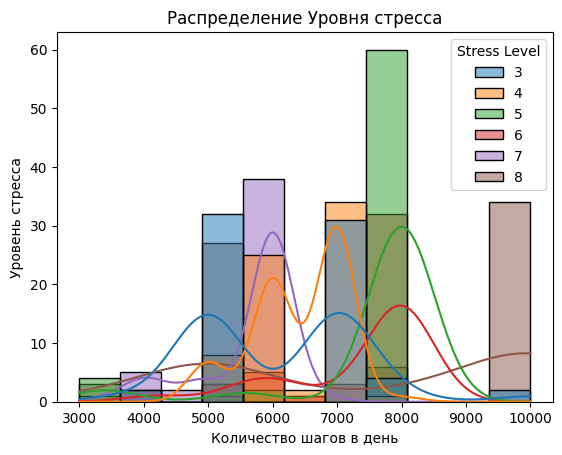

In [256]:
sns.histplot(df, x="Daily Steps", kde=True, hue='Stress Level')
plt.title('Распределение Уровня стресса')
plt.xlabel('Количество шагов в день')
plt.ylabel('Уровень стресса')
plt.show()

# 3. Выбрать `best_features`

In [257]:
categorial_features = ['Quality of Sleep', 'BMI Category', 'Gender', 'Sleep Disorder'] # перечислить названия колонок с категориальными фичами
numeric_features = ['Heart Rate', 'Age', 'Sleep Duration'] # перечислить названия колонок с числовыми фичами
best_features = categorial_features + numeric_features # соединение массивов

х = df[best_features]
y = df['Stress Level']

# 4. Сделать нормализацию данных (scaler, onehotencoding)

In [258]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [259]:
num_df = х.select_dtypes(include=[int, float]).copy()
std_scaled = pd.DataFrame(StandardScaler().fit_transform(num_df), columns=num_df.columns)

In [260]:
ohe = OneHotEncoder(sparse_output=False)  # drop='first' убирает лишнюю колонку
Quality_of_Sleep_encoded = pd.DataFrame(
    ohe.fit_transform(х[['Quality of Sleep']]),
    columns=ohe.get_feature_names_out(['Quality of Sleep'])
)

In [261]:
ohe = OneHotEncoder(sparse_output=False)  # drop='first' убирает лишнюю колонку
BMI_Category_encoded = pd.DataFrame(
    ohe.fit_transform(х[['BMI Category']]),
    columns=ohe.get_feature_names_out(['BMI Category'])
)

In [262]:
ohe = OneHotEncoder(sparse_output=False)  # drop='first' убирает лишнюю колонку
Gender_encoded = pd.DataFrame(
    ohe.fit_transform(х[['Gender']]),
    columns=ohe.get_feature_names_out(['Gender'])
)

In [263]:
ohe = OneHotEncoder(sparse_output=False)  # drop='first' убирает лишнюю колонку
Sleep_Disorder_encoded = pd.DataFrame(
    ohe.fit_transform(х[['Sleep Disorder']]),
    columns=ohe.get_feature_names_out(['Sleep Disorder'])
)

In [264]:
#X = pd.concat([std_scaled, Quality_of_Sleep_encoded, BMI_Category_encoded, Gender_encoded, Sleep_Disorder_encoded], axis=1)

In [265]:
#X = pd.concat([std_scaled, Quality_of_Sleep_encoded, Gender_encoded, Sleep_Disorder_encoded], axis=1)

In [266]:
#X = pd.concat([std_scaled, Quality_of_Sleep_encoded, Gender_encoded], axis=1)

In [267]:
X = pd.concat([std_scaled, Gender_encoded, Sleep_Disorder_encoded], axis=1)
X

,Heart Rate,Age,Sleep Duration,Gender_Female,Gender_Male,Sleep Disorder_Insomnia,Sleep Disorder_Sleep Apnea,Sleep Disorder_unknown
0,1.654719,-1.753096,-1.298887,0.0,1.0,0.0,0.0,1.0
1,1.170474,-1.637643,-1.173036,0.0,1.0,0.0,0.0,1.0
2,1.170474,-1.637643,-1.173036,0.0,1.0,0.0,0.0,1.0
3,3.591698,-1.637643,-1.550588,0.0,1.0,0.0,1.0,0.0
4,3.591698,-1.637643,-1.550588,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
369,-0.524383,1.941401,1.218127,1.0,0.0,0.0,1.0,0.0
370,-0.524383,1.941401,1.092276,1.0,0.0,0.0,1.0,0.0
371,-0.524383,1.941401,1.218127,1.0,0.0,0.0,1.0,0.0
372,-0.524383,1.941401,1.218127,1.0,0.0,0.0,1.0,0.0


# 5. Обучить модель логистической регрессии

In [268]:
from sklearn.linear_model import LogisticRegression

In [269]:
# объявим модель
model = LogisticRegression(
    penalty=None, # регуляризация (добавление штрафа за большие коэфициенты)
    random_state=42,
)

In [270]:
y.value_counts()

,count
Stress Level,
3,71
4,70
8,70
5,67
7,50
6,46


In [271]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
) # stratify - разделение данных с учетом распределнеия категориальной переменной

In [272]:
model.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(penalty=None, random_state=42)

In [273]:
y_pred_proba = model.predict_proba(X_test)
y_pred_proba

array([[9.77553160e-01, 2.23069007e-02, 1.39799482e-04, 1.31839085e-09,
        1.38475313e-07, 2.49948756e-42],
       [2.82633683e-10, 2.66434046e-03, 7.21538553e-01, 1.75019387e-01,
        1.00777700e-01, 1.96754334e-08],
       [3.84549269e-18, 2.93517742e-13, 1.86248738e-02, 7.63983555e-01,
        2.17391572e-01, 6.95846329e-12],
       [2.68353639e-15, 7.95364219e-09, 6.95378122e-05, 9.99926879e-01,
        3.57569548e-06, 2.92051532e-16],
       [3.27551921e-07, 1.62409841e-04, 9.65052904e-01, 1.99211692e-02,
        1.48631897e-02, 7.08278372e-20],
       [1.02168536e-02, 1.73166012e-02, 2.38424186e-02, 9.48624126e-01,
        6.07086158e-10, 2.66252924e-42],
       [2.12889026e-05, 9.79014749e-01, 1.83319403e-04, 2.07806410e-02,
        1.65504701e-09, 1.18353591e-26],
       [9.98032526e-27, 3.59265770e-18, 1.13412087e-14, 9.30157122e-19,
        3.48192030e-08, 9.99999965e-01],
       [1.02168536e-02, 1.73166012e-02, 2.38424186e-02, 9.48624126e-01,
        6.07086158e-10, 

In [274]:
for i in range(10):
  print([round(float(item), 2) for item in list(y_pred_proba[i] * 100)])

[97.76, 2.23, 0.01, 0.0, 0.0, 0.0]
[0.0, 0.27, 72.15, 17.5, 10.08, 0.0]
[0.0, 0.0, 1.86, 76.4, 21.74, 0.0]
[0.0, 0.0, 0.01, 99.99, 0.0, 0.0]
[0.0, 0.02, 96.51, 1.99, 1.49, 0.0]
[1.02, 1.73, 2.38, 94.86, 0.0, 0.0]
[0.0, 97.9, 0.02, 2.08, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 100.0]
[1.02, 1.73, 2.38, 94.86, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 100.0]


In [275]:
y_train_pred = model.predict(X_train)
y_train_proba = model.predict_proba(X_train)

In [276]:
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)

# 6. Вывести метрики качества, описать полученный результат (также вывести коэфициенты модели)

In [277]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix
)
import numpy as np

def evaluate_classification(y_true, y_pred, y_proba=None):

    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y_true, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)

    # ROC-AUC (если переданы вероятности)
    roc_auc = None
    if y_proba is not None:
        # Если многоклассовая классификация — One-vs-Rest
        classes = np.unique(y_true)
        y_true_onehot = np.eye(len(classes))[np.searchsorted(classes, y_true)]
        roc_auc = roc_auc_score(y_true_onehot, y_proba, multi_class='ovr')

    cm = confusion_matrix(y_true, y_pred)

    print("=== Метрики классификации ===")
    print(f"Accuracy:  {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall:    {rec:.4f}")
    print(f"F1-score:  {f1:.4f}")
    if roc_auc is not None:
        print(f"ROC-AUC:   {roc_auc:.4f}")
    print("\nConfusion Matrix:")
    print(cm)

    return {
        "accuracy": acc,
        "precision": prec,
        "recall": rec,
        "f1": f1,
        "roc_auc": roc_auc,
        "confusion_matrix": cm
    }

In [278]:
metrics = evaluate_classification(y_train, y_train_pred, y_train_proba)

=== Метрики классификации ===
Accuracy:  0.9387
Precision: 0.9397
Recall:    0.9387
F1-score:  0.9386
ROC-AUC:   0.9878

Confusion Matrix:
[[48  0  0  1  0  0]
 [ 1 45  3  0  0  0]
 [ 0  0 44  2  1  0]
 [ 0  1  3 26  0  2]
 [ 0  0  1  1 33  0]
 [ 0  0  0  0  0 49]]


In [279]:
metrics = evaluate_classification(y_test, y_pred, y_proba)

=== Метрики классификации ===
Accuracy:  0.8850
Precision: 0.8928
Recall:    0.8850
F1-score:  0.8861
ROC-AUC:   0.9578

Confusion Matrix:
[[20  1  0  1  0  0]
 [ 2 18  0  1  0  0]
 [ 0  0 20  0  0  0]
 [ 0  1  2 11  0  0]
 [ 0  0  0  4 11  0]
 [ 0  0  0  0  1 20]]
